In [153]:
import pandas as pd, numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%pylab inline


Populating the interactive namespace from numpy and matplotlib


In [107]:
battles = pd.read_csv("data/battles.csv")
char_deaths = pd.read_csv("data/character-deaths.csv")
char_pred = pd.read_csv("data/character-predictions.csv")

In [19]:
char_deaths_by_book = char_deaths.groupby(character_deaths.columns[3])
char_deaths_by_book

In [20]:
# Set parameters on plt
plt.rcParams["axes.labelsize"] = 16.
plt.rcParams["xtick.labelsize"] = 13.
plt.rcParams["ytick.labelsize"] = 13.
plt.rcParams["legend.fontsize"] = 11.

In [ ]:
# We wanted to look at the trend of deaths over time,
# to see if the story became more or less violent as time has progressed.
# We were surprised to see that the number of major deaths in battles actually
# decreased over time.

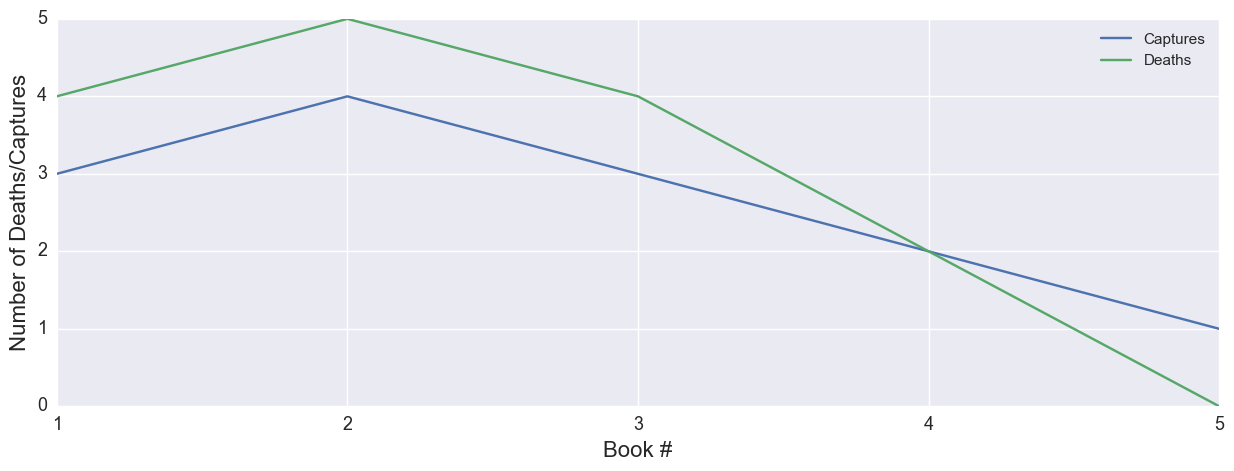

In [101]:
plt.figure(figsize=(15,5))
ax = plt.subplot(111)
width=0.5
battles_by_book = battles.groupby(battles.columns[3])
p1 = plt.plot(battles_by_book['major_capture','major_death'].sum())
ax.set(ylabel = 'Number of Deaths/Captures', xlabel = 'Book #', xticks=[1,2,3,4,5])
ax.legend(['Captures', 'Deaths'])
plt.show()

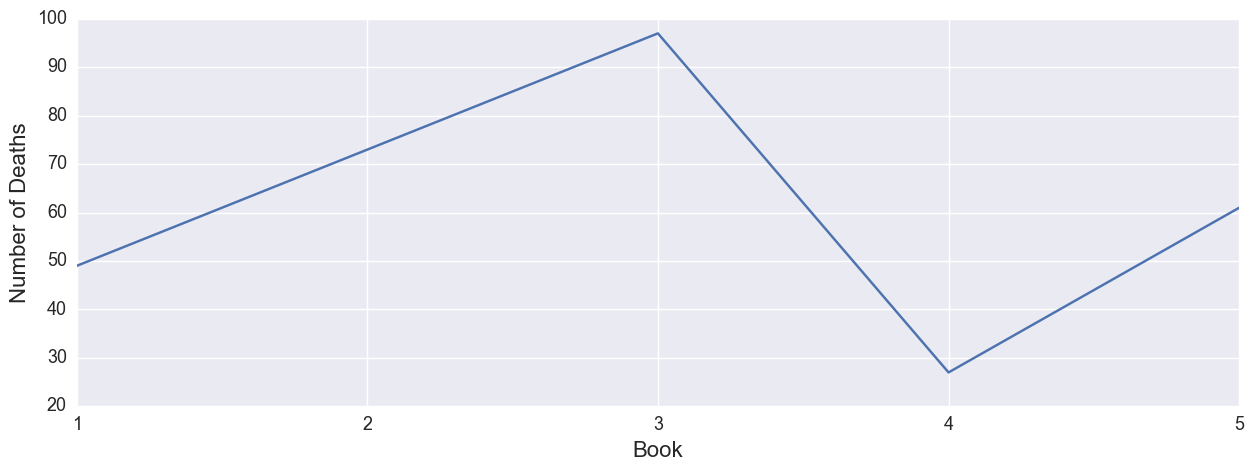

In [113]:
# We wanted to compare these Battle Deaths to the overall Deaths in the books.
# As we can see, there is a similarity in the fact that the number of killings by 
# the author decreases after book 3.

char_death_by_book = char_deaths.groupby(char_deaths.columns[3])
bookdeaths = char_death_by_book['Name'].count()
plt.figure(figsize=(15,5))
ax = plt.subplot(111)
width=0.5
p2 = plt.plot(bookdeaths)
ax.set(ylabel = 'Number of Deaths', xlabel = 'Book', xticks=[1,2,3,4,5])
plt.show()

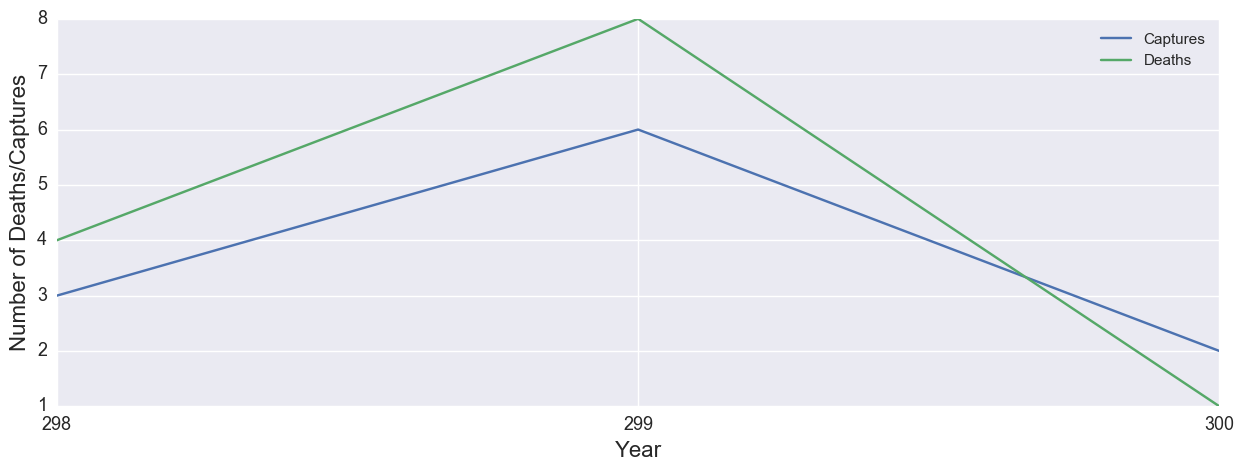

In [104]:
# We did the same thing for Captures and Deaths by Year.

battles_by_year = battles.groupby('year')
battles_by_year['major_capture','major_death'].sum()
plt.figure(figsize=(15,5))
ax = plt.subplot(111)
width=0.5
p3 = plt.plot(battles_by_year['major_capture','major_death'].sum())
ax.set(ylabel = 'Number of Deaths/Captures', xlabel = 'Year', xticks=[298,299,300])
ax.legend(['Captures', 'Deaths'])
plt.show()

In [36]:
battles_by_capture = battles.groupby('major_capture')
battles_by_capture.describe()
battles_by_majorDeath = battles.groupby('major_death')
battles_by_majorDeath.describe()

attacker_size  attacker_win  battle_number  book_number  \
major_death                                                                  
0           count      13.000000     24.000000      25.000000    25.000000   
            mean     4963.692308      0.958333      21.800000     3.200000   
            std      6043.815674      0.204124      11.405408     1.581139   
            min        20.000000      0.000000       3.000000     1.000000   
            25%      1000.000000      1.000000      11.000000     2.000000   
            50%      3000.000000      1.000000      23.000000     3.000000   
            75%      6000.000000      1.000000      32.000000     5.000000   
            max     20000.000000      1.000000      38.000000     5.000000   
1           count      11.000000     13.000000      13.000000    13.000000   
            mean    15826.636364      0.692308      15.076923     2.000000   
            std     28845.885226      0.480384       9.402673     0.816497   
            min       100.000000      0.000000       1.000000     1.000000   
            25%      2437.500000      0.000000       5.000000     1.000000   
            50%      5000.000000      1.000000      16.000000     2.000000   
            75%     16500.000000      1.000000      22.000000     3.000000   
            max    100000.000000      1.000000      28.000000     3.000000   

                   defender_3  defender_4  defender_size  major_capture  \
major_death                                                               
0           count         0.0         0.0       8.000000      25.000000   
            mean          NaN         NaN    5990.625000       0.200000   
            std           NaN         NaN    4973.930924       0.408248   
            min           NaN         NaN     200.000000       0.000000   
            25%           NaN         NaN     725.000000       0.000000   
            50%           NaN         NaN    7000.000000       0.000000   
            75%           NaN         NaN   10000.000000       0.000000   
            max           NaN         NaN   12625.000000       1.000000   
1           count         0.0         0.0      11.000000      13.000000   
            mean          NaN         NaN    6746.363636       0.461538   
            std           NaN         NaN    7223.066209       0.518875   
            min           NaN         NaN     100.000000       0.000000   
            25%           NaN         NaN    1620.000000       0.000000   
            50%           NaN         NaN    4000.000000       0.000000   
            75%           NaN         NaN    8625.000000       1.000000   
            max           NaN         NaN   20000.000000       1.000000   

                      summer        year  
major_death                               
0           count  24.000000   25.000000  
            mean    0.583333  299.280000  
            std     0.503610    0.678233  
            min     0.000000  298.000000  
            25%     0.000000  299.000000  
            50%     1.000000  299.000000  
            75%     1.000000  300.000000  
            max     1.000000  300.000000  
1           count  13.000000   13.000000  
            mean    0.923077  298.769231  
            std     0.277350    0.599145  
            min     0.000000  298.000000  
            25%     1.000000  298.000000  
            50%     1.000000  299.000000  
            75%     1.000000  299.000000  
            max     1.000000  300.000000

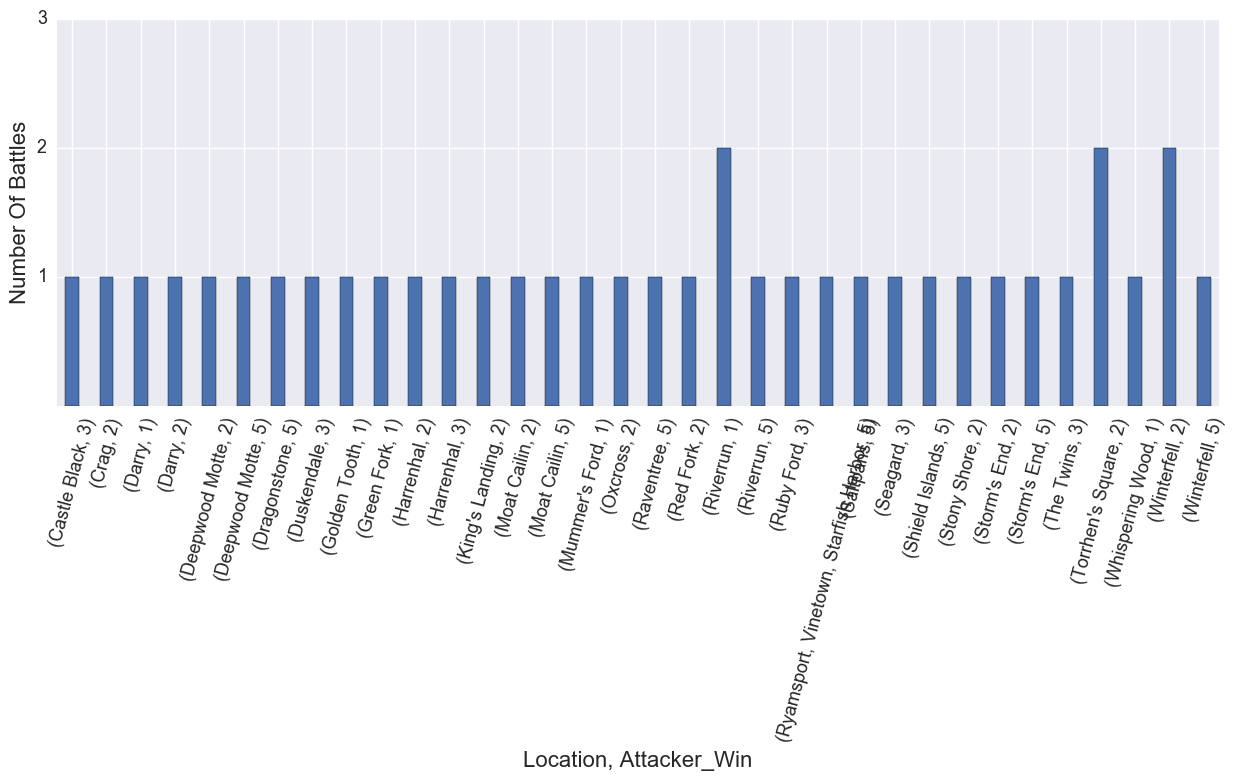

In [85]:
# We wanted to look at the frequency of Battles in different Locations.

battles_by_location = battles.groupby(['location','book_number'])

bat = battles_by_location['name'].count();
bat.sort_values()

data = bat.values;
names = bat.index;

plt.figure(figsize=(15,5))
ax = plt.subplot(111)
width=0.5
p1 = bat.plot.bar(stacked=True,rot=75,width=.4)
p1.set(ylabel = 'Number Of Battles', xlabel = 'Location, Attacker_Win', yticks=[1,2,3])
plt.show()

In [ ]:
# Next, we wanted to see if there was any correlation between 
# the number of dead relatives and your own death.

isAlive              0     1
boolDeadRelations           
0                  415  1386
1                   80    65


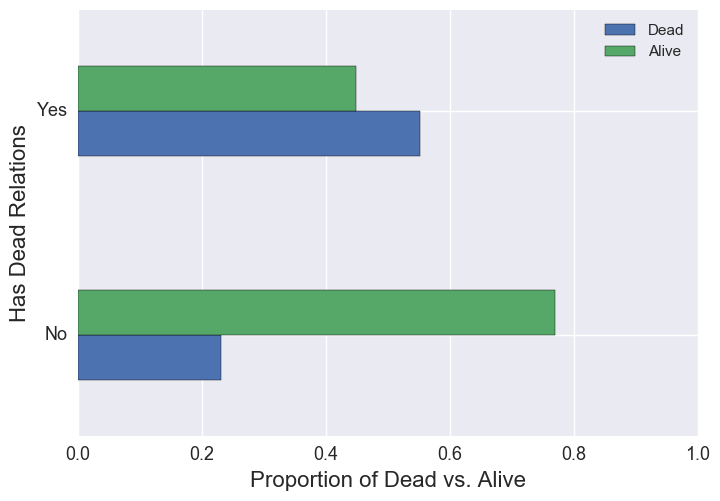

In [118]:
data = char_pred.groupby(["boolDeadRelations", "isAlive"]).count()["S.No"]
data = data.unstack()
print (data)
#data = char_pred.groupby(["boolDeadRelations", "isAlive"]).count()["S.No"].unstack().copy(deep = True)
percentages = data.div(data.sum(axis = 1), axis = 0)
p = percentages.plot.barh(stacked = False, rot = 0, width = .4)
p.set(yticklabels = ["No", "Yes"], xlim = [0,1],xlabel = "Proportion of Dead vs. Alive", ylabel = "Has Dead Relations"), p.legend(["Dead", "Alive"]);
plt.figure(figsize=(15,5))
plt.show()

In [ ]:
# We can see here that you are more likely to be alive if none of your relations are dead.

In [119]:
# Next, we wanted to look at the outcomes of the battles. Our end goal that we went
# into this process with was to try and predict the outcome of a battle, given the type of the battle
# and the size of the respective armies. 

In [120]:
# So first, we explore the success of the attackers.
BattlesByAttackKingWinLoss = battles.groupby(['attacker_king','attacker_outcome']).count()['name'].unstack()
print(BattlesByAttackKingWinLoss)

attacker_outcome          loss   win
attacker_king                       
Balon/Euron Greyjoy        NaN   7.0
Joffrey/Tommen Baratheon   1.0  13.0
Robb Stark                 2.0   8.0
Stannis Baratheon          2.0   2.0


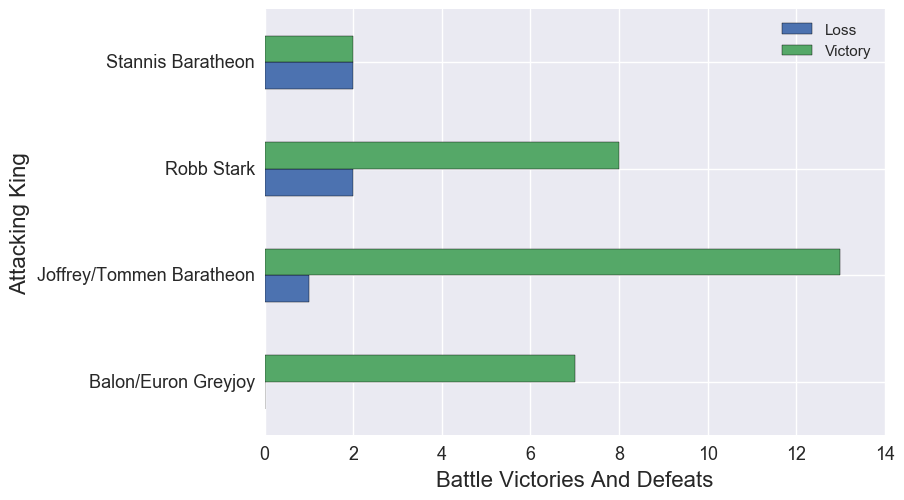

In [133]:
p1 = BattlesByAttackKingWinLoss.plot.barh(stacked = False, rot = 0, width = .5)
p1.set(yticklabels = BattlesByAttackKingWinLoss.index, xlabel = "Battle Victories And Defeats", ylabel = "Attacking King"), p1.legend(["Loss", "Victory"]);
ax = plt.subplot(111)
plt.figure(figsize=(15,5))
plt.show()




attacker_outcome          loss   win
defender_king                       
Balon/Euron Greyjoy        NaN   4.0
Joffrey/Tommen Baratheon   3.0   9.0
Mance Rayder               1.0   NaN
Renly Baratheon            NaN   1.0
Robb Stark                 1.0  13.0
Stannis Baratheon          NaN   2.0


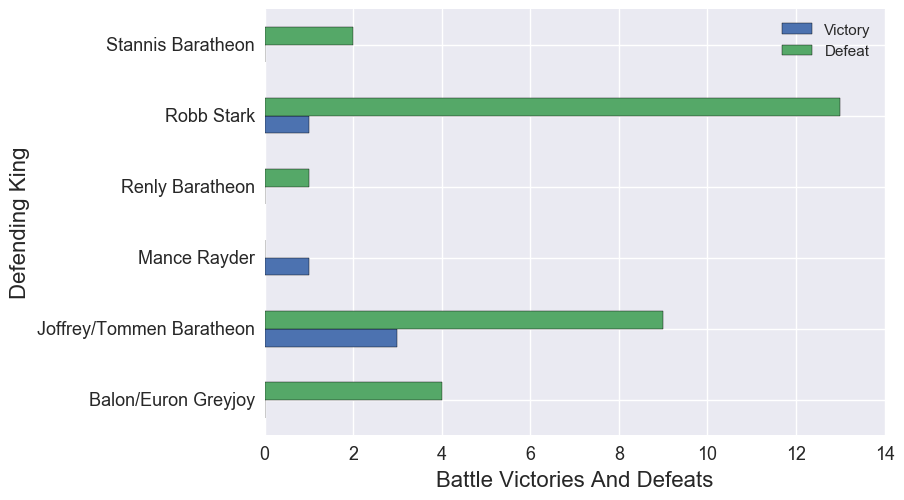

In [137]:
BattlesByDefendingKingWinLoss = battles.groupby(['defender_king','attacker_outcome']).count()['name'].unstack()
print(BattlesByDefendingKingWinLoss)
p2 = BattlesByDefendingKingWinLoss.plot.barh(stacked = False, rot = 0, width = .5)
p2.set(yticklabels = BattlesByDefendingKingWinLoss.index, xlabel = "Battle Victories And Defeats", ylabel = "Defending King"), p2.legend(["Victory", "Defeat"]);
plt.figure(figsize=(15,5))
plt.show()

In [ ]:
# So we can see here, that whenever Kings decide to attack,
# their proportion of success is significantly higher than if they were defending. 

In [138]:
# Next, we want to explore the relationship between the type of battle, and its outcome.
battlesByType = battles.groupby(['battle_type','attacker_outcome']).count()['name'].unstack()
battlesByType

attacker_outcome,loss,win
battle_type,,
ambush,NaN,10.0
pitched battle,4.0,10.0
razing,NaN,2.0
siege,1.0,10.0


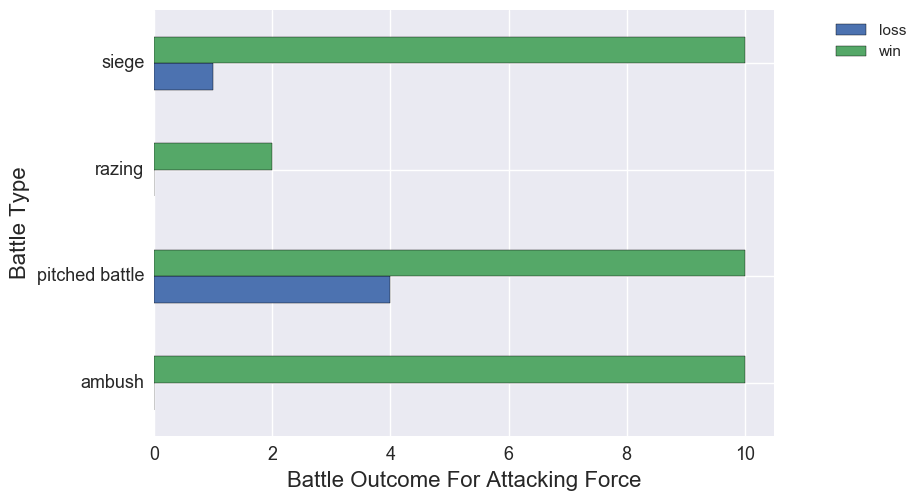

In [141]:
p3 = battlesByType.plot.barh(stacked = False, rot = 0, width = .5)
p3.set(yticklabels = battlesByType.index, xlim=[0,10.5],xlabel = "Battle Outcome For Attacking Force", ylabel = "Battle Type"), p3.legend(["Defeat", "Victory"])
p3.legend(bbox_to_anchor=(1.235,1));
plt.figure(figsize=(15,5))
plt.show()


# We can see here that the data for razing is quite insufficient, as there are only 2 razes.
# We can also see that all the ambushes ended in a victory for the attacker.
# For further analysis, we will exclude the razing battles, as the data is just not sufficient.

In [142]:
# Now, we wish to also include the army size in our prediction of the outcomes.
# We want to use a k-Nearest Neighbors algorithm, to run on our data for each
# type of battle(Pitched Battle, Ambush, Siege)
from sklearn import neighbors

In [143]:
X = battles[['attacker_size','defender_size','battle_type','attacker_outcome']]

# Create Classifiers for each type of battle.
clf_pitched = neighbors.KNeighborsClassifier(5)
clf_ambush = neighbors.KNeighborsClassifier(5)
clf_siege = neighbors.KNeighborsClassifier(1)
#clf_raze = neighbors.KNeighborsClassifier(5)

# Create a mapping from every type of battle to an integer value
mymap1 = {'pitched battle': 1, 'ambush': 2, 'siege': 3, 'razing': 4,'win':1, 'loss':0};


X = X.applymap(lambda s: mymap1.get(s) if s in mymap1 else s)
# Exclude all NaN values
X = X[np.isfinite(X['attacker_size'])]
X = X[np.isfinite(X['defender_size'])]
X = X[np.isfinite(X['battle_type'])]
X = X[np.isfinite(X['attacker_outcome'])]

BigX = X[['attacker_size','defender_size','battle_type']]
y = X['attacker_outcome']

# Create non-pandas matrices containing the data about army size for each type of battle.
# 1. Pitched Battles
bb = BigX[BigX['battle_type'] == 1][['attacker_size','defender_size']].as_matrix()

# 2. Ambushes
bbb = BigX[BigX['battle_type'] == 2][['attacker_size','defender_size']].as_matrix()

# 3. Sieges
bbbb = BigX[BigX['battle_type'] == 3][['attacker_size','defender_size']].as_matrix()
#bbbbb = BigX[BigX['battle_type'] == 4][['attacker_size','defender_size']].as_matrix()

# Create non-pandas matrices containing the 'solutions'(whether or not the attacker won)
# for each type of battle.

# 1. Pitched Battles
by = y[BigX['battle_type'] == 1].as_matrix()
# 2. Ambushes
bby = y[BigX['battle_type'] == 2].as_matrix()
# 3. Sieges
bbby = y[BigX['battle_type'] == 3].as_matrix()
#bbbby = y[BigX['battle_type'] == 4].as_matrix()

# Now we fit our data to the solutions using our k-Nearest Neighbors Algorithm
clf_pitched.fit(bb,by);
clf_ambush.fit(bbb,bby);
clf_siege.fit(bbbb,bbby);
#clf_raze.fit(bbbbb,bbbby);

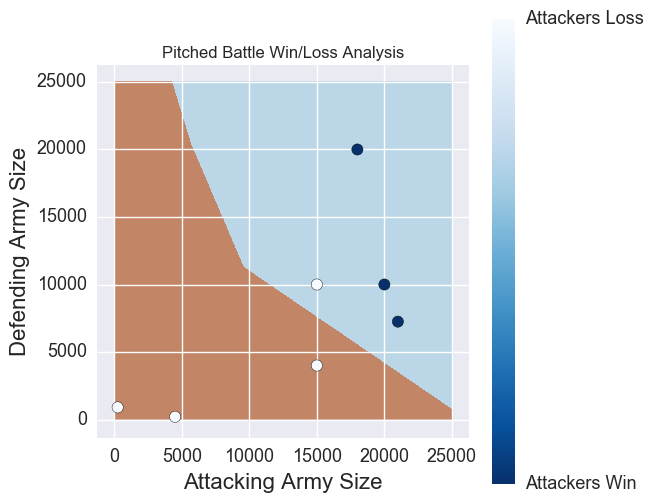

In [155]:
import matplotlib.cm as cm
# Step size of the mesh. Decrease to increase the quality of the VQ.
h = 10    # point in the mesh [x_min, m_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
#x_min, x_max = bb[:, 0].min() -.5, bb[:, 0].max() +.5
#y_min, y_max = bb[:, 1].min() -.5, bb[:, 1].max() +.5
x_min, x_max = 0, 25000
y_min, y_max = 0, 25000
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

pred = clf_pitched.predict(np.c_[xx.ravel(), yy.ravel()])
pred = pred.reshape(xx.shape)

plt.figure(figsize=(6,6));
ax = plt.subplot(111,aspect='equal')
plt.clf()

plt.imshow(pred, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='equal', origin='lower', alpha=0.7)

plt.scatter(bb[:, 0], bb[:, 1], c=by, s = 65, cmap=cm.Blues_r)
plt.title('Pitched Battle Win/Loss Analysis')
plt.ylabel('Defending Army Size')
plt.xlabel('Attacking Army Size')
plt.cbar = colorbar()
plt.cbar.set_ticks([0,1])
plt.cbar.set_ticklabels(['Attackers Win','Attackers Loss'])
plt.show()

In [156]:
# From this graph, we can see that there isn't a clear relationship between
# the difference in size of the Attacking army and Defending army, when it comes to a pitched battle.
# However, the main determining factor in predicting the outcome of a pitched battle
# is the size of both the armies. When the total size of both armies is relatively small,
# as can be seen by the brown portion of the graph, the defending army has a higher chance of 
# winning. But when the combined size of the armies is larger(>25,000) as indicated by the blue
# portion of the graph, the attacking army has a better chance of winning the battle.


NameError: name 'x' is not defined

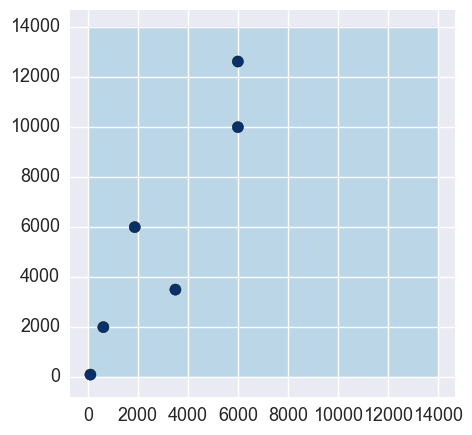

In [158]:
# Step size of the mesh. Decrease to increase the quality of the VQ.
h = 10    # point in the mesh [x_min, m_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
#x_min, x_max = bbb[:, 0].min() -.5, bbb[:, 0].max() +.5
#y_min, y_max = bbb[:, 1].min() -.5, bbb[:, 1].max() +.5

x_min, x_max = 0, 14000
y_min, y_max = 0, 14000

xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

pred = clf_ambush.predict(np.c_[xx.ravel(), yy.ravel()])
pred = pred.reshape(xx.shape)

figure(figsize=(8,5))
plt.clf()

plt.imshow(pred, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='equal', origin='lower', alpha=0.7)

plt.scatter(bbb[:, 0], bbb[:, 1], c=bby, s = 65, cmap=cm.Blues_r)
title('Ambush Battle Win/Loss Analysis')
ylabel('Defending Army Size')
xlabel('Attacking Army Size')
cbar = colorbar()
cbar.set_ticks([0,1])
cbar.set_ticklabels(['Attackers Win','Attackers Loss'])

In [159]:
# All the data we have for ambushes ends with the attacking army winning.
# What we can see on the graph, is that in all the ambushes that occurred,
# the size of the attacking army was always smaller than the army that was ambushed,
# yet the attacking army still always won. We can conclude that the element of surprise
# is not to be overlooked, and that an ambush is highly favorable for the attacking army.

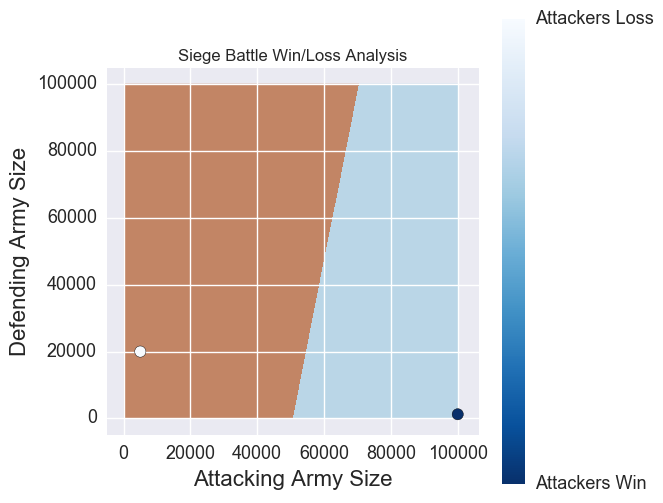

In [160]:
# Step size of the mesh. Decrease to increase the quality of the VQ.
h = 100    # point in the mesh [x_min, m_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
#x_min, x_max = bbbb[:, 0].min() -.5, bbbb[:, 0].max() +.5
#y_min, y_max = bbbb[:, 1].min() -.5, bbbb[:, 1].max() +.5
x_min, x_max = 0, 100000
y_min, y_max = 0, 100000
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

pred = clf_siege.predict(np.c_[xx.ravel(), yy.ravel()])
pred = pred.reshape(xx.shape)

figure(figsize=(6,6));
plt.clf()

plt.imshow(pred, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='equal', origin='lower', alpha=0.7)

plt.scatter(bbbb[:, 0], bbbb[:, 1], c=bbby, s = 65, cmap=cm.Blues_r)
title('Siege Battle Win/Loss Analysis')
ylabel('Defending Army Size')
xlabel('Attacking Army Size')
cbar = colorbar()
cbar.set_ticks([0,1])
cbar.set_ticklabels(['Attackers Win','Attackers Loss'])

In [161]:
# So for the siege case, we only have two datapoints, as there were only two sieges in the book series so far. 
# That being said, with more data we could have a more accurate model of this relationship.

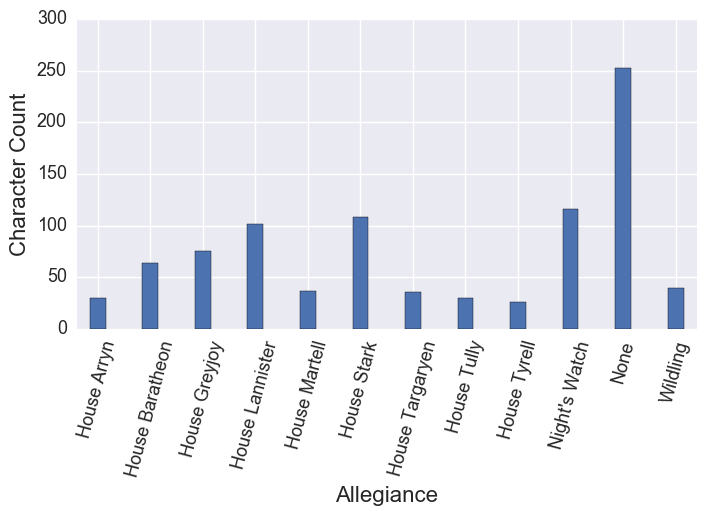

In [162]:
mymap3 = {'Arryn':'House Arryn','Baratheon':'House Baratheon','Greyjoy':'House Greyjoy','Lannister':'House Lannister','Martell':'House Martell','Stark':'House Stark','Tully':'House Tully','Tyrell':'House Tyrell','Targaryen':'House Targaryen'}
char_deaths = char_deaths.applymap(lambda s: mymap3.get(s) if s in mymap3 else s)
figure(figsize(8,4));
allegianceCounts = char_deaths.groupby('Allegiances').count()['Name']
p6 = allegianceCounts.plot.bar(stacked=False, rot = 75, width = .3);
p6.set(ylabel = "Character Count", xlabel = "Allegiance");

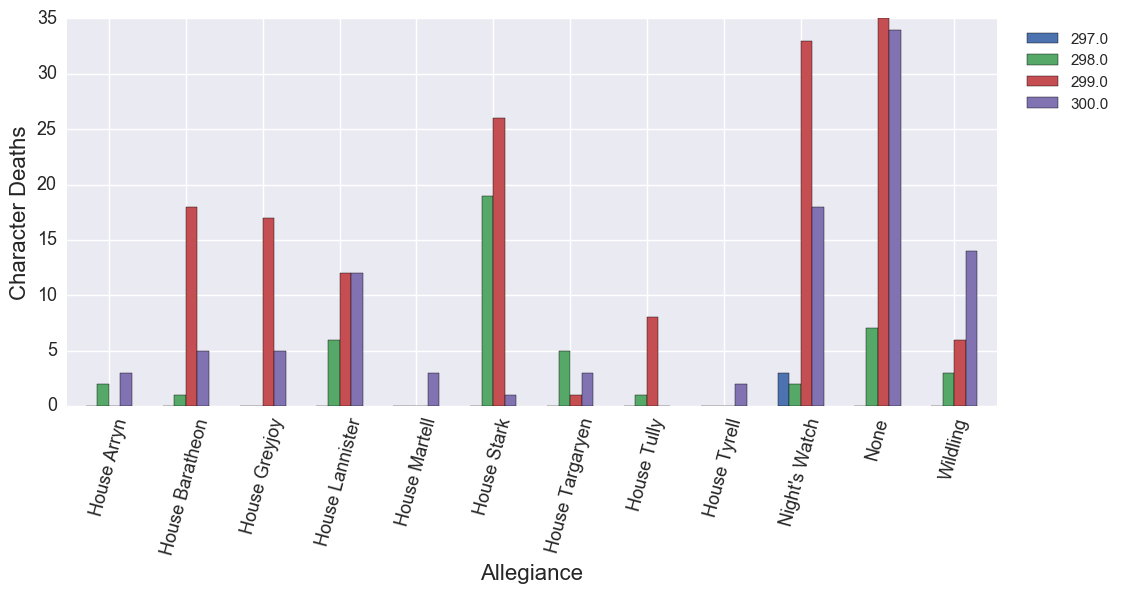

In [163]:
mymap3 = {'Arryn':'House Arryn','Baratheon':'House Baratheon','Greyjoy':'House Greyjoy','Lannister':'House Lannister','Martell':'House Martell','Stark':'House Stark','Tully':'House Tully','Tyrell':'House Tyrell','Targaryen':'House Targaryen'}
char_deaths = char_deaths.applymap(lambda s: mymap3.get(s) if s in mymap3 else s)
figure(figsize(12,5));
allegDeathYear=char_deaths.groupby(['Allegiances','Death Year']).count()['Name'].unstack();
p5 = allegDeathYear.plot.bar(stacked=False, rot = 75, width = .6);
p5.set(ylabel = "Character Deaths", xlabel = "Allegiance"), p5.legend(["Year 297","Year 298", "Year 299","Year 300"]);
p5.legend(bbox_to_anchor=(1.135,1));